In [1]:
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import shuffle
from openpyxl import load_workbook
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
size = 224
def read_image(f):
    image = load_img(f, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    image = preprocess_input(image)    
    return(image)

In [3]:
size = 224
traindata_folderPath = 'D:\\Data\\DataAugmentation\\TrainingData\\TrainData_Augmentation\\'
validdata_folderPath = 'D:\\Data\\DataAugmentation\\TrainingData\\ValidationData_Augmentation\\'
testdata_folderpath='D:\\Data\\DataAugmentation\\TestData\\TestingData_Augmentation\\'
columnName = 'live'
excelFileName = "D://Data//Perron_phenotype-GSU-training.xlsx"
sheetName = 'Total Database'
imgPat = 'PIL-55a_3dayLBCR-3'

In [4]:
train_filelist= [file for file in os.listdir(traindata_folderPath) if file.endswith('.jpeg')]
valid_filelist= [file for file in os.listdir(validdata_folderPath) if file.endswith('.jpeg')]
test_filelist= [file for file in os.listdir(testdata_folderpath) if file.endswith('.jpeg')]

In [5]:
n_files = len(train_filelist)
print('Total number of files in directory:', n_files)
n_files = len(valid_filelist)
print('Total number of files in directory:', n_files)
n_files = len(test_filelist)
print('Total number of files in directory:', n_files)

Total number of files in directory: 1849
Total number of files in directory: 599
Total number of files in directory: 600


In [6]:
wb = load_workbook(excelFileName)

In [7]:
sheet = wb[sheetName]

In [8]:
def getColumnNumber(columnName, sheet):
    reqColNum = -1
    maxColNumber = sheet.max_column + 1
    for x in range(1, maxColNumber):
        cellValue = sheet.cell(row=1, column=x).value
        if(cellValue == columnName):
                reqColNum = x
                break
    return(reqColNum)

In [9]:
import re
def getStrainNumber(imageName):
    strt = imageName.find('-')
    end = imageName.find('_')
    imgNam = imageName[strt+1:end]
    
    imgNam = re.sub(r'[a-z]', '', imgNam)
    return(imgNam)

In [10]:
def getRowNumber(strainNumber, sheet, columnNumber):
    
    reqRowNum = -1
    maxRowNumber = sheet.max_row + 1
    strainNumbr = float(strainNumber)
    
    for x in range(1, maxRowNumber):
        cellVal = sheet.cell(row=x, column=columnNumber).value
        try:
            cellValue = float(cellVal)            
            if(cellValue == strainNumbr):
                reqRowNum = x
                break
        except ValueError:
            continue
    return(reqRowNum) 

In [11]:
colNumber = getColumnNumber(columnName, sheet)

In [12]:
strainColumnNumber = getColumnNumber('strain', sheet)

In [13]:
X_Train = []
Y_Train = []
print('Reading train images ...')
for file in train_filelist:
    imagepath = os.path.join(traindata_folderPath, file)
    im = read_image(imagepath)
    #print(im.shape)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Train.append(im)
            Y_Train.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [14]:
X_Valid = []
Y_Valid = []
print('Reading train images ...')
for file in valid_filelist:
    imagepath = os.path.join(validdata_folderPath, file)
    im = read_image(imagepath)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Valid.append(im)
            Y_Valid.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [15]:
X_Test = []
Y_Test = []
print('Reading train images ...')
for file in test_filelist:
    imagepath = os.path.join(testdata_folderpath, file)
    im = read_image(imagepath)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Test.append(im)
            Y_Test.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [16]:
X_Train = np.array(X_Train)
print(X_Train.shape, 'x Shape')

Y_Train = np.array(Y_Train).reshape(-1,1)
print(Y_Train.shape, 'y Shape')

X_Valid = np.array(X_Valid)
print(X_Valid.shape, 'x Shape')

Y_Valid = np.array(Y_Valid).reshape(-1,1)
print(Y_Valid.shape, 'y Shape')

X_Test = np.array(X_Test)
print(X_Test.shape, 'x Shape')

Y_Test = np.array(Y_Test).reshape(-1,1)
print(Y_Test.shape, 'y Shape')

(1849, 224, 224, 3) x Shape
(1849, 1) y Shape
(599, 224, 224, 3) x Shape
(599, 1) y Shape
(600, 224, 224, 3) x Shape
(600, 1) y Shape


In [17]:
# Store Model metrics
history = {}

In [45]:
# Plot Chart
def plot_chart_to_file(best_epoch, best_value):

    # Plot Chart
    fig = plt.figure(dpi=300)

    # Subplot for Loss
    ax1 = fig.add_subplot(111)    
    ax1.plot(history.history['mean_squared_error'], color='b', 
    label='TrainMSE')
    ax1.plot(history.history['val_mean_squared_error'], color='g', 
    label='validationMSE')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('MSE')
    ax1.legend(loc='lower left', bbox_to_anchor=(0, -0.30))
    #ax2 = ax1.twinx()
    #ax2.plot(history.history['mean_squared_error'], color='y', 
    #label='TrainMSE Loss')
    #ax2.plot(history.history['val_mean_squared_error'], color='c', 
    #label='validationMSE Loss')
    ax1.plot(best_epoch, best_value, 'r+', label='Best Model')
    #ax2.set_ylabel('Loss')   
    #ax2.legend(loc='lower right', bbox_to_anchor=(1, -0.30))
    # Set Title
    plt.title('Model - Best Epoch (' + str(best_epoch) + ')')
    plt.show()
    # .. and save..
    plt.savefig('Blog3_Model_Chart_Regression_MSE_live.png', 
    bbox_inches="tight")   

In [19]:

# Get VGG16 architecture from keras.applications
from keras.applications.vgg16 import VGG16,decode_predictions

# downloading weights and convolution layers from vgg16
trained_model= VGG16(include_top=False,weights='imagenet')
# print(trained_model.summary())

# defining mlp that needs to be appended to vgg16 convolution layers
x = trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
output = Dense(1,activation='linear')(x)

model= Model(inputs=trained_model.input,outputs=output)


In [20]:
for layer in trained_model.layers:
    layer.trainable=False

In [21]:
for layer in trained_model.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [24]:
#compiling the model
adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error',metrics=['MSE'],optimizer=adam)
patience = 30
earlystop = EarlyStopping(monitor="val_loss",min_delta=0,mode="min",patience=patience,verbose=1)
checkpoint = ModelCheckpoint('modelweights_Regression_live.hdf5', 
                              monitor='val_loss', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='min')
callbacks = [checkpoint,earlystop]

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [26]:
#fitting the model
history =model.fit(X_Train,Y_Train,epochs=150,batch_size=16,validation_data=(X_Valid,Y_Valid),callbacks=callbacks)

Train on 1849 samples, validate on 599 samples
Epoch 1/150
1849/1849 [==============================] - 87s 47ms/step - loss: 450.9877 - mean_squared_error: 450.9877 - val_loss: 227.7474 - val_mean_squared_error: 227.7474

Epoch 00001: val_loss improved from inf to 227.74739, saving model to modelweights_Regression_live.hdf5
Epoch 2/150
1849/1849 [==============================] - 86s 46ms/step - loss: 64.9652 - mean_squared_error: 64.9652 - val_loss: 156.9272 - val_mean_squared_error: 156.9272

Epoch 00002: val_loss improved from 227.74739 to 156.92720, saving model to modelweights_Regression_live.hdf5
Epoch 3/150
1849/1849 [==============================] - 87s 47ms/step - loss: 29.3181 - mean_squared_error: 29.3181 - val_loss: 188.5516 - val_mean_squared_error: 188.5516

Epoch 00003: val_loss did not improve from 156.92720
Epoch 4/150
1849/1849 [==============================] - 85s 46ms/step - loss: 24.1839 - mean_squared_error: 24.1839 - val_loss: 156.1042 - val_mean_squared_error

1849/1849 [==============================] - 75s 41ms/step - loss: 2.1552 - mean_squared_error: 2.1552 - val_loss: 178.1108 - val_mean_squared_error: 178.1108

Epoch 00071: val_loss did not improve from 121.81236
Epoch 72/150
1849/1849 [==============================] - 76s 41ms/step - loss: 8.2145 - mean_squared_error: 8.2145 - val_loss: 167.1043 - val_mean_squared_error: 167.1043

Epoch 00072: val_loss did not improve from 121.81236
Epoch 73/150
1849/1849 [==============================] - 76s 41ms/step - loss: 4.1984 - mean_squared_error: 4.1984 - val_loss: 172.2173 - val_mean_squared_error: 172.2173

Epoch 00073: val_loss did not improve from 121.81236
Epoch 74/150
1849/1849 [==============================] - 76s 41ms/step - loss: 1.7089 - mean_squared_error: 1.7089 - val_loss: 163.0012 - val_mean_squared_error: 163.0012

Epoch 00074: val_loss did not improve from 121.81236
Epoch 75/150
1849/1849 [==============================] - 76s 41ms/step - loss: 2.2228 - mean_squared_error: 

In [27]:
# Reload Best Model for further usage....
model.load_weights('modelweights_Regression_live.hdf5')

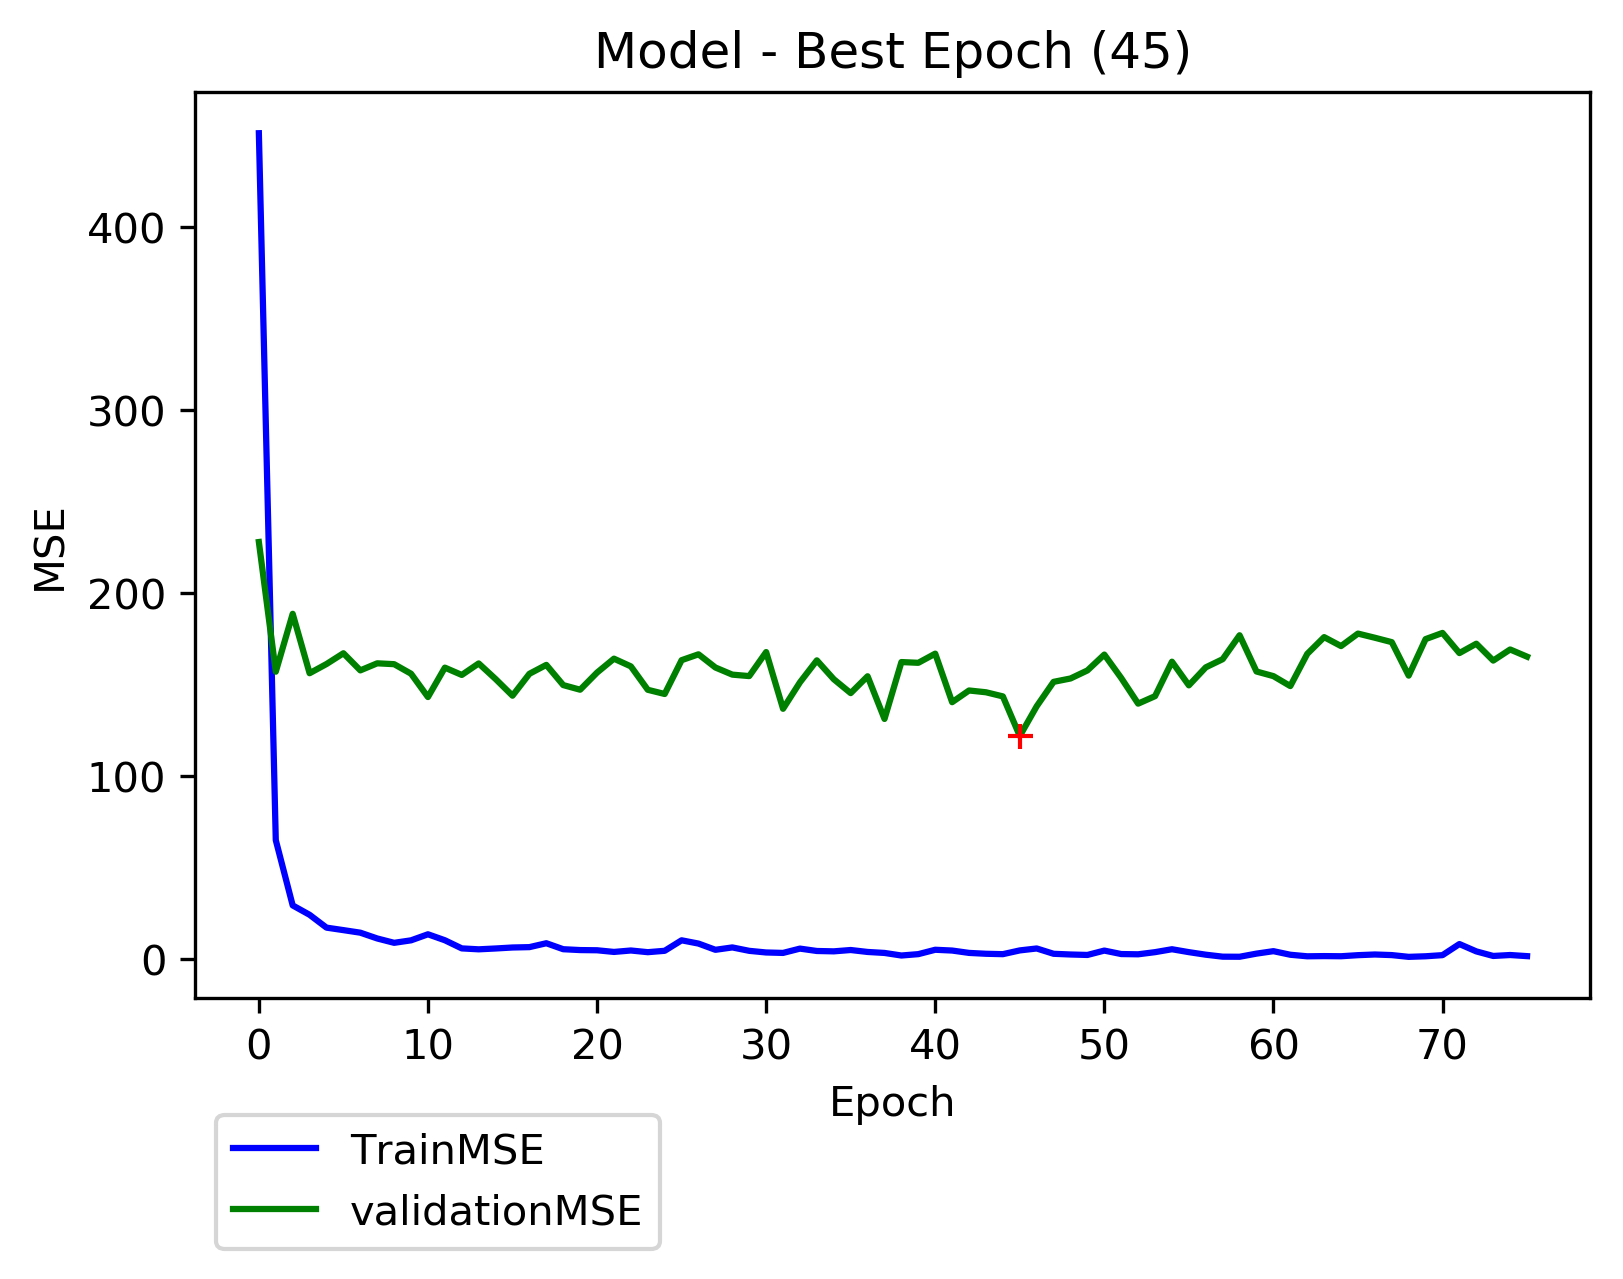

In [47]:
# Plot Charts
plot_chart_to_file(earlystop.stopped_epoch - patience, earlystop.best)

In [40]:
scores_Train = model.evaluate(X_Train, Y_Train, verbose=0)
print(model.metrics_names[1], scores_Train[1])

mean_squared_error 12.7374746989


In [41]:
scores_Valid = model.evaluate(X_Valid,Y_Valid, verbose=0)
print(model.metrics_names[1], scores_Valid[1])

mean_squared_error 21.812443708


In [42]:
scores = model.evaluate(X_Test, Y_Test, verbose=0)
print(model.metrics_names[1], scores[1])

mean_squared_error 87.430079753


In [ ]:
history.history